In [59]:
#Load necessary modules
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches, text, patheffects
import cv2
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import ast

#Load CSV file of Labelbox labels in COCO format
path = r"/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Labels/coco/labelbox.csv"
with open(path) as f:
  usfws = pd.read_csv(f)

In [60]:
usfws['bbox'] = usfws['bbox'].apply(ast.literal_eval)

In [63]:
#1- Subset the label set just for the test image (I just reuse the code and overwrite the "snip" file each time)
testimg = "BDA_12C_20181127_1.JPG"
df = usfws.loc[usfws['filename'] == testimg]

bboxes, filenames, cats = df["bbox"].to_list(), df["filename"], df["category"]

In [64]:
#LABEL PREPARATION FOR DBSCAN INPUT

#2- Derive centers for all bboxes
x = []
y = []
centers = []
for coord in bboxes:
    center = (coord[0]+(coord[2]/2), coord[1]+(coord[3]/2))
    x.append(center[0])
    y.append(center[1])
    centers.append(center)

#3- Make these centers into coordinate format to be compatible with DBSCAN
new = []
for row in centers:
    coord = list(row)
    new.append(coord)

#4- Transform the new list of center coordinates into a numpy array for DBSCAN
array = np.array(new)

IndexError: list index out of range

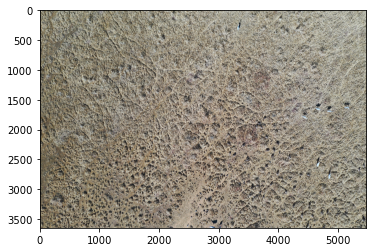

In [66]:
img = "BDA_12C_20181127_1.JPG"

#Display bounding boxes on image for verification

#TEST: ONE BOX

fig, ax = plt.subplots()

img = cv2.imread(str('/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Imagery/USFWS/raw/BDA_12C_20181127_1.JPG'))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
ax.imshow(img)

x = ["bbox"][0]
y = ["bbox"][1]
w = ["bbox"][2]
h = ["bbox"][3]

x1 = x+(w/2)
y1 = y+(h/2)

ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))
ax.scatter(x1, y1)

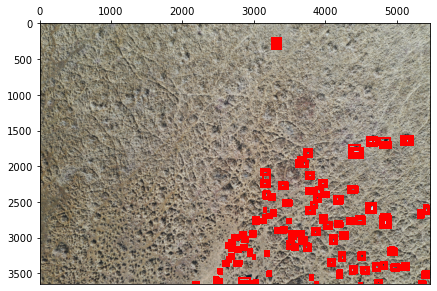

In [67]:
def get_bb(bboxes, img):  
    boxes = bboxes.copy()
    
    return np.squeeze(boxes)

def img_show(img, ax = None, figsize=(7,11)):
  if ax is None: fig, ax = plt.subplots(figsize=figsize)
  ax.xaxis.tick_top()
  ax.imshow(img)  
  return ax

def draw_box(img, ax, bb):
  patch = ax.add_patch(patches.Rectangle((bb[0],bb[1]), bb[2], bb[3], fill=False, edgecolor='red', lw=2))
  
def plot_sample(img,bboxes, ax=None, figsize=(7,11)):
  bb = get_bb(bboxes, img)
  ax = img_show(img, ax=ax)
  for i in range(len(bboxes)):
    draw_box(img,ax,bb[i])

plot_sample(img,bboxes)